In [361]:
import numpy as np 
import pandas as pd

In [362]:
square_meters = np.random.randint(75,500,1300)
house_prices = square_meters*2601
house_years = np.random.randint(0,30,1300)

idx=0
for idx in range(len(house_years)):
    value = house_prices[idx]
    factor = house_years[idx]
    house_prices[idx] = value - value*factor/100
square_meters

array([260, 126, 208, ..., 402, 156, 126])

In [363]:
data_dict={"House Price":house_prices,
           "Square Meter":square_meters,
           "Building Age":house_years}
data_frame = pd.DataFrame(data_dict)
data_frame

,House Price,Square Meter,Building Age
0,628921,260,7
1,327726,126,0
2,508547,208,6
3,144199,77,28
4,434887,176,5
...,...,...,...
1295,364556,192,27
1296,762509,349,16
1297,961953,402,8
1298,308374,156,24


In [364]:
import seaborn as sbn
import matplotlib.pyplot as plt

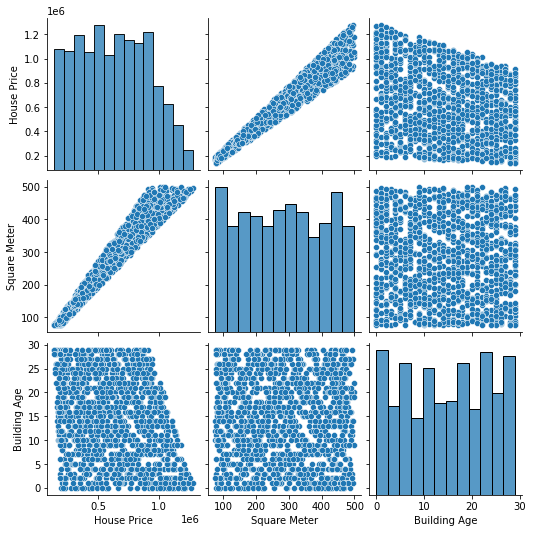

In [365]:
sbn.pairplot(data_frame)

In [366]:
from sklearn.model_selection import train_test_split

In [367]:
y = data_frame["House Price"].values

x = data_frame[["Square Meter","Building Age"]]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33)

In [368]:
x_test.shape

(429, 2)

In [369]:
y_train.shape

(871,)

In [370]:
from sklearn.preprocessing import MinMaxScaler

In [371]:
scaler = MinMaxScaler()

In [372]:
scaler.fit(x_train)

MinMaxScaler()

In [373]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [374]:
x_train

array([[0.19811321, 0.10344828],
       [0.56603774, 0.24137931],
       [0.12028302, 0.17241379],
       ...,
       [0.41273585, 0.17241379],
       [0.85613208, 0.96551724],
       [0.46933962, 0.24137931]])

In [375]:
import tensorflow as tf

In [376]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [377]:
model = Sequential()

model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(8,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="rmsprop", loss="mse")

In [378]:
model.fit(x_train,y_train,epochs=250)

Epoch 1/250
28/28 [==============================] - 0s 748us/step - loss: 481675247616.0000
Epoch 2/250
28/28 [==============================] - 0s 819us/step - loss: 481674395648.0000
Epoch 3/250
28/28 [==============================] - 0s 712us/step - loss: 481673248768.0000
Epoch 4/250
28/28 [==============================] - 0s 795us/step - loss: 481671479296.0000
Epoch 5/250
28/28 [==============================] - 0s 748us/step - loss: 481669021696.0000
Epoch 6/250
28/28 [==============================] - 0s 784us/step - loss: 481665548288.0000
Epoch 7/250
28/28 [==============================] - 0s 784us/step - loss: 481660796928.0000
Epoch 8/250
28/28 [==============================] - 0s 677us/step - loss: 481654505472.0000
Epoch 9/250
28/28 [==============================] - 0s 784us/step - loss: 481646182400.0000
Epoch 10/250
28/28 [==============================] - 0s 750us/step - loss: 481635336192.0000
Epoch 11/250
28/28 [==============================] - 0s 784us/step -

28/28 [==============================] - 0s 659us/step - loss: 110467309568.0000
Epoch 89/250
28/28 [==============================] - 0s 640us/step - loss: 99580624896.0000
Epoch 90/250
28/28 [==============================] - 0s 617us/step - loss: 89633046528.0000
Epoch 91/250
28/28 [==============================] - 0s 611us/step - loss: 80414580736.0000
Epoch 92/250
28/28 [==============================] - 0s 657us/step - loss: 72774369280.0000
Epoch 93/250
28/28 [==============================] - 0s 679us/step - loss: 66374156288.0000
Epoch 94/250
28/28 [==============================] - 0s 675us/step - loss: 61431414784.0000
Epoch 95/250
28/28 [==============================] - 0s 638us/step - loss: 57780944896.0000
Epoch 96/250
28/28 [==============================] - 0s 626us/step - loss: 55488671744.0000
Epoch 97/250
28/28 [==============================] - 0s 615us/step - loss: 54280732672.0000
Epoch 98/250
28/28 [==============================] - 0s 585us/step - loss: 534924

28/28 [==============================] - 0s 606us/step - loss: 16086107136.0000
Epoch 176/250
28/28 [==============================] - 0s 642us/step - loss: 15676149760.0000
Epoch 177/250
28/28 [==============================] - 0s 598us/step - loss: 15271729152.0000
Epoch 178/250
28/28 [==============================] - 0s 606us/step - loss: 14839823360.0000
Epoch 179/250
28/28 [==============================] - 0s 557us/step - loss: 14405678080.0000
Epoch 180/250
28/28 [==============================] - 0s 619us/step - loss: 13981429760.0000
Epoch 181/250
28/28 [==============================] - 0s 604us/step - loss: 13575906304.0000
Epoch 182/250
28/28 [==============================] - 0s 572us/step - loss: 13183632384.0000
Epoch 183/250
28/28 [==============================] - 0s 602us/step - loss: 12758524928.0000
Epoch 184/250
28/28 [==============================] - 0s 570us/step - loss: 12354904064.0000
Epoch 185/250
28/28 [==============================] - 0s 606us/step - los

In [379]:
loss = model.history.history["loss"]

<AxesSubplot:>

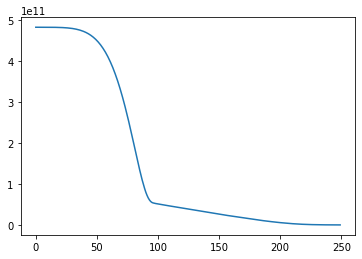

In [380]:
sbn.lineplot(x=range(len(loss)),y=loss)

In [381]:
train_loss = model.evaluate(x_train,y_train,verbose=0)

In [382]:
test_loss = model.evaluate(x_test,y_test,verbose=0)

In [383]:
train_loss

796256576.0

In [384]:
test_loss

854378368.0

In [385]:
test_predictions = model.predict(x_test)

In [386]:
test_predictions

array([[ 657420.2  ],
       [ 637832.6  ],
       [ 455534.6  ],
       [1024968.9  ],
       [1162144.2  ],
       [ 335750.44 ],
       [ 689754.1  ],
       [ 879954.1  ],
       [1041613.9  ],
       [ 547933.94 ],
       [ 600202.4  ],
       [ 524595.1  ],
       [ 546483.94 ],
       [ 518300.6  ],
       [1018726.75 ],
       [ 809937.5  ],
       [ 979047.5  ],
       [ 357135.03 ],
       [ 682660.8  ],
       [ 330349.38 ],
       [ 891996.7  ],
       [ 625989.75 ],
       [ 660120.75 ],
       [ 952713.56 ],
       [ 167439.19 ],
       [1002985.3  ],
       [ 265933.6  ],
       [ 929574.4  ],
       [ 434644.16 ],
       [ 240797.69 ],
       [ 798042.25 ],
       [ 899037.5  ],
       [ 681011.1  ],
       [ 894644.75 ],
       [ 999885.5  ],
       [ 272984.38 ],
       [1117820.2  ],
       [ 826782.1  ],
       [ 495109.03 ],
       [ 580866.94 ],
       [ 350987.72 ],
       [1013924.7  ],
       [ 185429.38 ],
       [ 997037.75 ],
       [1032965.7  ],
       [ 5

In [387]:
prediction_dframe = pd.DataFrame(y_test, columns=["Real Y"])

In [388]:
prediction_dframe

,Real Y
0,662578
1,641978
2,467711
3,1078920
4,1235995
...,...
424,428592
425,660133
426,504620
427,730360


In [389]:
test_predictions = pd.Series(test_predictions.reshape(429,))

In [390]:
test_predictions

0      6.574202e+05
1      6.378326e+05
2      4.555346e+05
3      1.024969e+06
4      1.162144e+06
           ...     
424    4.111581e+05
425    6.543727e+05
426    5.008570e+05
427    7.400782e+05
428    1.019725e+06
Length: 429, dtype: float32

In [391]:
prediction_dframe = pd.concat([prediction_dframe,test_predictions],axis=1)

In [392]:
prediction_dframe.columns = ["Real Y", "Prediction Y"]
prediction_dframe

,Real Y,Prediction Y
0,662578,6.574202e+05
1,641978,6.378326e+05
2,467711,4.555346e+05
3,1078920,1.024969e+06
4,1235995,1.162144e+06
...,...,...
424,428592,4.111581e+05
425,660133,6.543727e+05
426,504620,5.008570e+05
427,730360,7.400782e+05


<AxesSubplot:xlabel='Real Y', ylabel='Prediction Y'>

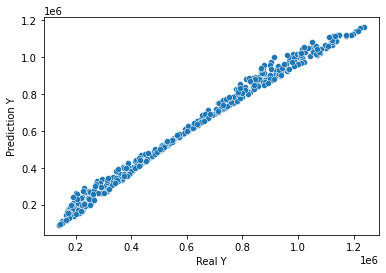

In [393]:
sbn.scatterplot(x = "Real Y", y = "Prediction Y", data = prediction_dframe)

In [394]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [395]:
mean_absolute_error(prediction_dframe["Real Y"], prediction_dframe["Prediction Y"])

22596.552884615383

In [396]:
mean_squared_error(prediction_dframe["Real Y"], prediction_dframe["Prediction Y"])

854378393.4294274

In [397]:
data_frame.describe()

,House Price,Square Meter,Building Age
count,1.300000e+03,1300.000000,1300.000000
mean,6.291479e+05,283.490769,14.699231
std,2.839102e+05,124.031338,8.750647
min,1.421960e+05,75.000000,0.000000
25%,3.857342e+05,176.750000,7.000000
50%,6.285700e+05,282.500000,15.000000
75%,8.608262e+05,394.000000,22.000000
max,1.279770e+06,499.000000,29.000000


In [398]:
new_house_features = [[120,22]]

In [399]:
new_house_features = scaler.transform(new_house_features)

In [400]:
model.predict(new_house_features)

array([[206719.11]], dtype=float32)

In [401]:
from tensorflow.keras.models import load_model

In [403]:
model.save("house price model.h5")